In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import optuna
# import optuna.visualization as vis
# import plotly
from optuna.samplers import RandomSampler
from optuna_dashboard import run_server
from sklearn.model_selection import learning_curve

In [335]:
pub = pd.read_csv('data/public_data.csv')
submit_pd = pd.read_csv('data/minta_beadando_rand.csv')

In [336]:
pub.head()

,rowID,season,periodID,day_in_period,hour,minute,holyday,weekday,ke,hupx,afrr_fel,afrr_le,mfrr_fel,mfrr_le,afrr,solar_becsult_dayahead,rendszerterheles_terv,target_flag,target_reg
0,0,1,18,0,0,0,False,2,899.343121,287.7194,0.0000,-103.196933,0.0,0.0,-212.845947,0.0,6514.140945,0.0,-100.188708
1,1,1,18,0,0,15,False,2,899.374587,287.7194,55.9286,-5.617200,0.0,0.0,263.427160,0.0,6482.184545,0.0,-100.292441
2,2,1,18,0,0,30,False,2,899.303875,287.7194,69.6826,-9.355800,0.0,0.0,273.927320,0.0,6310.363525,0.0,-100.059327
3,3,1,18,0,0,45,False,2,899.299787,287.7194,30.2718,-16.943567,0.0,0.0,132.621040,0.0,6158.798885,0.0,-100.045850
4,4,1,18,0,1,0,False,2,897.436947,283.6309,25.9714,-12.064167,0.0,0.0,151.888080,0.0,6137.148085,0.0,-104.954619


In [337]:
df = pub.copy()
df.head()

,rowID,season,periodID,day_in_period,hour,minute,holyday,weekday,ke,hupx,afrr_fel,afrr_le,mfrr_fel,mfrr_le,afrr,solar_becsult_dayahead,rendszerterheles_terv,target_flag,target_reg
0,0,1,18,0,0,0,False,2,899.343121,287.7194,0.0000,-103.196933,0.0,0.0,-212.845947,0.0,6514.140945,0.0,-100.188708
1,1,1,18,0,0,15,False,2,899.374587,287.7194,55.9286,-5.617200,0.0,0.0,263.427160,0.0,6482.184545,0.0,-100.292441
2,2,1,18,0,0,30,False,2,899.303875,287.7194,69.6826,-9.355800,0.0,0.0,273.927320,0.0,6310.363525,0.0,-100.059327
3,3,1,18,0,0,45,False,2,899.299787,287.7194,30.2718,-16.943567,0.0,0.0,132.621040,0.0,6158.798885,0.0,-100.045850
4,4,1,18,0,1,0,False,2,897.436947,283.6309,25.9714,-12.064167,0.0,0.0,151.888080,0.0,6137.148085,0.0,-104.954619


In [338]:
pub = pd.read_csv('data/public_data.csv')

def f(x):
    if x == 4:
        return "submit"
    elif x == 3:
        return "test"
    else:
        return "train"
    
df['train_test_validation']=df['day_in_period'].apply(f)

In [339]:
df['periodID'].nunique()

187

In [340]:
input_variables = ['hour', 'minute', 'holyday', 'weekday', 'ke','hupx',	'afrr_fel',	'afrr_le',	'mfrr_fel',	'mfrr_le',	'afrr',	'solar_becsult_dayahead','rendszerterheles_terv']

In [341]:
train_df = df[df['train_test_validation'] == 'train']
test_df = df[df['train_test_validation'] == 'test']
submit_df = df[df['train_test_validation'] == 'submit']

In [342]:
print(train_df)

       rowID  season  periodID  day_in_period  hour  minute  holyday  weekday  \
0          0       1        18              0     0       0    False        2   
1          1       1        18              0     0      15    False        2   
2          2       1        18              0     0      30    False        2   
3          3       1        18              0     0      45    False        2   
4          4       1        18              0     1       0    False        2   
...      ...     ...       ...            ...   ...     ...      ...      ...   
89563  93068      11       194              2    22      45    False        6   
89564  93069      11       194              2    23       0    False        6   
89565  93070      11       194              2    23      15    False        6   
89566  93071      11       194              2    23      30    False        6   
89567  93072      11       194              2    23      45    False        6   

               ke      hupx

In [343]:
print(test_df)

       rowID  season  periodID  day_in_period  hour  minute  holyday  weekday  \
288      288       1        18              3     0       0    False        5   
289      289       1        18              3     0      15    False        5   
290      290       1        18              3     0      30    False        5   
291      291       1        18              3     0      45    False        5   
292      292       1        18              3     1       0    False        5   
...      ...     ...       ...            ...   ...     ...      ...      ...   
89659  93164      11       194              3    22      45    False        0   
89660  93165      11       194              3    23       0    False        0   
89661  93166      11       194              3    23      15    False        0   
89662  93167      11       194              3    23      30    False        0   
89663  93168      11       194              3    23      45    False        0   

               ke      hupx

In [344]:
print(submit_df)

       rowID  season  periodID  day_in_period  hour  minute  holyday  weekday  \
384      384       1        18              4     0       0    False        6   
385      385       1        18              4     0      15    False        6   
386      386       1        18              4     0      30    False        6   
387      387       1        18              4     0      45    False        6   
388      388       1        18              4     1       0    False        6   
...      ...     ...       ...            ...   ...     ...      ...      ...   
89755  93260      11       194              4    22      45    False        1   
89756  93261      11       194              4    23       0    False        1   
89757  93262      11       194              4    23      15    False        1   
89758  93263      11       194              4    23      30    False        1   
89759  93264      11       194              4    23      45    False        1   

       ke  hupx  afrr_fel  

In [345]:
"""
randF_C = RandomForestClassifier(random_state=42,
                                 n_estimators=33,
                                 max_depth=7)
"""
"""
randF_R = RandomForestRegressor(random_state=42,
                            n_estimators=33,
                            max_depth=7)
"""

'\nrandF_R = RandomForestRegressor(random_state=42,\n                            n_estimators=33,\n                            max_depth=7)\n'

In [346]:

# actual old training
# randF_C.fit(train_df[input_variables],train_df['target_flag'])

param_grid = {
    
    #'n_estimators' : [15, 33, 50, 100, 150],
    #'max_depth' : [None, 7, 10, 15, 20],
    #'min_samples_leaf' : [1, 2, 4, 8],
    #'max_features' : [None, 'auto', 'sqrt', 'log2']
    
    # 'n_estimators': [15, 33, 50],
    # 'max_depth': [None, 7, 10],
    # 'min_samples_leaf': [1, 2],
    #'max_features': [None, 'auto']
    
    # 'n_estimators': [15, 33, 50, 100],
    # 'criterion': ['gini', 'entropy'],
    # 'max_depth': [7, 10, 15],
    # 'min_samples_leaf': [1, 2, 4],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4],
    # 'max_features': ['sqrt', 'log2', None],
    # 'max_leaf_nodes': [None, 10, 20, 30, 40],
}
# rf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

#randF_R.fit(train_df[input_variables],train_df['target_reg'])

In [347]:
# grid_search.fit(train_df[input_variables],train_df['target_flag'])
# best_rf = grid_search.best_estimator_

In [348]:
# print(grid_search.best_params_)
# best_rf = grid_search.best_estimator_
# print(best_rf)

# gridsearch training
# best_rf = RandomForestClassifier(random_state=42, min_impurity_decrease=0.2, n_estimators=300, max_depth=200, min_samples_leaf = 50, max_features = 'sqrt', max_leaf_nodes=100, ccp_alpha=0.0, criterion='gini', min_weight_fraction_leaf=0.5)
# best_rf.fit(train_df[input_variables],train_df['target_flag'])

In [349]:
"""
Optuna objective definition
"""
def objective(trial):
    """
    n_estimators = trial.suggest_int('n_estimators', 1, 30)
    max_depth = trial.suggest_int('max_depth', 1, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 150)
    max_features = trial.suggest_categorical(name="max_features", choices=['sqrt', 'log2'])
    ccp_alpha = 0.5
    class_weight = trial.suggest_categorical(name="class_weight", choices=['balanced', 'balanced_subsample'])
    min_impurity_decrease = trial.suggest_float('min_impurity_decrease', 0.0, 1.0)
    
    hpo_rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, class_weight = class_weight, max_features=max_features, ccp_alpha=ccp_alpha, random_state=42)
    hpo_rf.fit(train_df[input_variables],train_df['target_flag'])
    
    mean_cv_accuracy = cross_val_score(hpo_rf, train_df[input_variables], train_df['target_flag'], cv=3, n_jobs=-1, scoring='f1_weighted').sum()
    return mean_cv_accuracy
    """
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 150)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_impurity_decrease = trial.suggest_float('min_impurity_decrease', 0.0, 0.1)
    ccp_alpha = trial.suggest_float('ccp_alpha', 0.0, 0.05)
    max_features = trial.suggest_categorical(name="max_features", choices=['sqrt', 'log2'])
      
    hpo_rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, ccp_alpha=ccp_alpha, min_impurity_decrease=min_impurity_decrease, max_features=max_features, random_state=42)
    mean_cv_accuracy = cross_val_score(hpo_rf, train_df[input_variables], train_df['target_flag'], cv=3, n_jobs=-1, scoring='roc_auc').mean()
    return mean_cv_accuracy


In [350]:
"""
Optuna study
"""

db_storage = "sqlite:///db.sqlite3"
current_datetime = datetime.datetime.now()
study_name = f"random_forest_classifier{current_datetime.strftime('%Y-%m-%d_%H-%M-%S')}"
study = optuna.create_study(
    direction="maximize",
    storage=db_storage,  # Specify the storage URL here.
    study_name=study_name,
    pruner=optuna.pruners.MedianPruner(
        n_startup_trials=5, n_warmup_steps=30, interval_steps=10
    ),
)
study.optimize(objective, n_trials=500, n_jobs=-1)

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2024-12-10 00:02:43,980] A new study created in RDB with name: random_forest_classifier2024-12-10_00-02-43


[I 2024-12-10 00:02:47,579] Trial 0 finished with value: 0.956326599827598 and parameters: {'n_estimators': 134, 'min_samples_leaf': 72, 'max_depth': 14, 'min_impurity_decrease': 0.08194205987627387, 'ccp_alpha': 0.012582773541192728, 'max_features': 'log2'}. Best is trial 0 with value: 0.956326599827598.
[I 2024-12-10 00:02:47,660] Trial 2 finished with value: 0.9649483345113065 and parameters: {'n_estimators': 134, 'min_samples_leaf': 142, 'max_depth': 20, 'min_impurity_decrease': 0.026848698037271135, 'ccp_alpha': 0.044652948575297446, 'max_features': 'log2'}. Best is trial 2 with value: 0.9649483345113065.
[I 2024-12-10 00:02:48,391] Trial 1 finished with value: 0.9551230878602635 and parameters: {'n_estimators': 181, 'min_samples_leaf': 43, 'max_depth': 38, 'min_impurity_decrease': 0.045884846445267524, 'ccp_alpha': 0.007610578495906517, 'max_features': 'log2'}. Best is trial 2 with value: 0.9649483345113065.
[I 2024-12-10 00:02:49,655] Trial 5 finished with value: 0.9571088933987

Accuracy: 0.9926164253084658
Best hyperparameters: {'n_estimators': 239, 'min_samples_leaf': 23, 'max_depth': 19, 'min_impurity_decrease': 1.8926482416876284e-05, 'ccp_alpha': 8.958898882577499e-05, 'max_features': 'log2'}


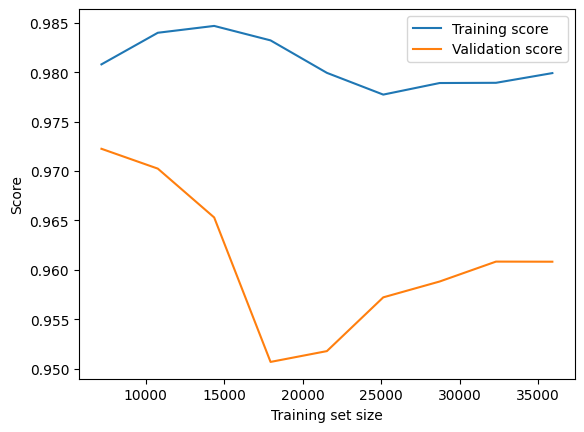

In [351]:
# best_rf_hpo = RandomForestClassifier(random_state=42, **study.best_params)
# best_rf_hpo.fit(train_df[input_variables], train_df['target_flag'])

# Plotting the learning curve
best_rf_hpo = RandomForestClassifier(n_estimators=33,
                                              max_depth=2,
                                              min_samples_leaf=2,
                                              ccp_alpha=5e-15,
                                              min_impurity_decrease=7e-2,
                                              class_weight = 'balanced',
                                              random_state=42)

train_sizes, train_scores, val_scores = learning_curve(
    best_rf_hpo,
    train_df[input_variables],
    train_df['target_flag'],
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.legend()
plt.show()




In [352]:
# optuna.visualization.plot_param_importances(study)
# optuna.visualization.plot_optimization_history(study).show()
# optuna.visualization.plot_param_importances(study).show()
# optuna.visualization.plot_parallel_coordinate(study).show()
# optuna.visualization.plot_slice(study).show()

In [353]:
test_df=test_df.copy()

In [354]:
test_df

,rowID,season,periodID,day_in_period,hour,minute,holyday,weekday,ke,hupx,afrr_fel,afrr_le,mfrr_fel,mfrr_le,afrr,solar_becsult_dayahead,rendszerterheles_terv,target_flag,target_reg,train_test_validation
288,288,1,18,3,0,0,False,5,818.432049,254.4823,0.0000,-166.681833,0.0,0.0,-277.150007,0.0,6449.113965,1.0,76.721089,test
289,289,1,18,3,0,15,False,5,821.300604,254.4823,3.7986,-25.764100,0.0,0.0,15.072000,0.0,6358.788545,1.0,67.264315,test
290,290,1,18,3,0,30,False,5,821.300418,254.4823,0.0000,-52.983133,0.0,0.0,-159.524560,0.0,6264.255005,1.0,67.264929,test
291,291,1,18,3,0,45,False,5,821.300604,254.4823,0.0000,-115.675467,0.0,0.0,-225.485493,0.0,6148.678605,1.0,67.264315,test
292,292,1,18,3,1,0,False,5,827.623523,251.2670,0.0000,-189.880167,0.0,0.0,-300.647673,0.0,6143.636545,1.0,37.729526,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89659,93164,11,194,3,22,45,False,0,798.111149,245.0325,48.5940,-4.068233,0.0,0.0,255.125000,0.0,5290.121743,1.0,118.173067,test
89660,93165,11,194,3,23,0,False,0,955.757579,242.8421,7.5478,-23.976433,0.0,0.0,34.992160,0.0,5260.683360,0.0,-407.460437,test
89661,93166,11,194,3,23,15,False,0,955.062473,242.8421,70.2754,-0.058900,0.0,0.0,331.860320,0.0,5233.595753,0.0,-405.168878,test
89662,93167,11,194,3,23,30,False,0,798.423227,242.8421,13.5954,-8.259433,0.0,0.0,145.118240,0.0,5208.690177,1.0,111.224239,test


In [355]:
best_rf_hpo.fit(train_df[input_variables], train_df['target_flag'])

RandomForestClassifier(ccp_alpha=5e-15, class_weight='balanced', max_depth=2,
                       min_impurity_decrease=0.07, min_samples_leaf=2,
                       n_estimators=33, random_state=42)

In [356]:
test_df['tipp_C1']=best_rf_hpo.predict_proba(test_df[input_variables])[:,1]

In [357]:
test_df

,rowID,season,periodID,day_in_period,hour,minute,holyday,weekday,ke,hupx,...,afrr_le,mfrr_fel,mfrr_le,afrr,solar_becsult_dayahead,rendszerterheles_terv,target_flag,target_reg,train_test_validation,tipp_C1
288,288,1,18,3,0,0,False,5,818.432049,254.4823,...,-166.681833,0.0,0.0,-277.150007,0.0,6449.113965,1.0,76.721089,test,0.844956
289,289,1,18,3,0,15,False,5,821.300604,254.4823,...,-25.764100,0.0,0.0,15.072000,0.0,6358.788545,1.0,67.264315,test,0.844956
290,290,1,18,3,0,30,False,5,821.300418,254.4823,...,-52.983133,0.0,0.0,-159.524560,0.0,6264.255005,1.0,67.264929,test,0.844956
291,291,1,18,3,0,45,False,5,821.300604,254.4823,...,-115.675467,0.0,0.0,-225.485493,0.0,6148.678605,1.0,67.264315,test,0.844956
292,292,1,18,3,1,0,False,5,827.623523,251.2670,...,-189.880167,0.0,0.0,-300.647673,0.0,6143.636545,1.0,37.729526,test,0.844956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89659,93164,11,194,3,22,45,False,0,798.111149,245.0325,...,-4.068233,0.0,0.0,255.125000,0.0,5290.121743,1.0,118.173067,test,0.611768
89660,93165,11,194,3,23,0,False,0,955.757579,242.8421,...,-23.976433,0.0,0.0,34.992160,0.0,5260.683360,0.0,-407.460437,test,0.383278
89661,93166,11,194,3,23,15,False,0,955.062473,242.8421,...,-0.058900,0.0,0.0,331.860320,0.0,5233.595753,0.0,-405.168878,test,0.127034
89662,93167,11,194,3,23,30,False,0,798.423227,242.8421,...,-8.259433,0.0,0.0,145.118240,0.0,5208.690177,1.0,111.224239,test,0.651458


In [358]:
"""
test_df['tipp_R1']=test_df['tipp_R1']-minX
maxX = test_df['tipp_R1'].max()
test_df['tipp_R1']=test_df['tipp_R1']/maxX
"""

"\ntest_df['tipp_R1']=test_df['tipp_R1']-minX\nmaxX = test_df['tipp_R1'].max()\ntest_df['tipp_R1']=test_df['tipp_R1']/maxX\n"

In [359]:
#test_df['tipp_R1'].describe()

In [360]:
roc_auc_score(test_df['target_flag'],test_df['tipp_C1'])

np.float64(0.9765023681160758)

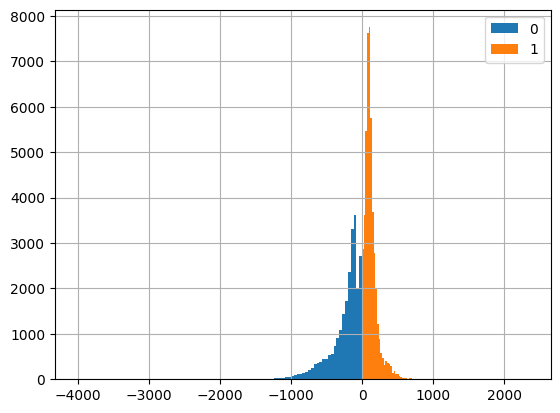

In [361]:
for i in [0,1]:
    cdf = df[df['target_flag']==i]
    cdf['target_reg'].hist(bins=100)
plt.legend(['0','1'])

<Axes: >

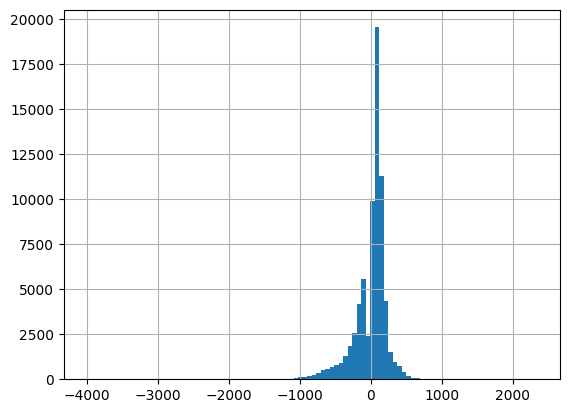

In [362]:
df['target_reg'].hist(bins=100)

In [363]:
submit_df = submit_df.copy()
submit_df

,rowID,season,periodID,day_in_period,hour,minute,holyday,weekday,ke,hupx,afrr_fel,afrr_le,mfrr_fel,mfrr_le,afrr,solar_becsult_dayahead,rendszerterheles_terv,target_flag,target_reg,train_test_validation
384,384,1,18,4,0,0,False,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5269.072857,NaN,NaN,submit
385,385,1,18,4,0,15,False,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5254.072107,NaN,NaN,submit
386,386,1,18,4,0,30,False,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5236.946580,NaN,NaN,submit
387,387,1,18,4,0,45,False,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5228.023347,NaN,NaN,submit
388,388,1,18,4,1,0,False,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5238.872100,NaN,NaN,submit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89755,93260,11,194,4,22,45,False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5256.726477,NaN,NaN,submit
89756,93261,11,194,4,23,0,False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5228.971040,NaN,NaN,submit
89757,93262,11,194,4,23,15,False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5203.779573,NaN,NaN,submit
89758,93263,11,194,4,23,30,False,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5180.754317,NaN,NaN,submit


In [364]:
submit_df['prediction'] = best_rf_hpo.predict_proba(submit_df[input_variables])[:, 1]

In [365]:
submit_df=submit_df[['rowID','prediction']]

In [366]:
submit_df

,rowID,prediction
384,384,0.844956
385,385,0.844956
386,386,0.844956
387,387,0.844956
388,388,0.844956
...,...,...
89755,93260,0.844956
89756,93261,0.844956
89757,93262,0.844956
89758,93263,0.844956


In [367]:
current_time = datetime.datetime.now()

time_string = current_time.strftime("%Y%m%d_%H%M%S")

filename = f"prediction_datas/hpo_{time_string}.csv"

submit_df.to_csv(filename, index=False)

In [368]:
run_server(db_storage)

Bottle v0.13.2 server starting up (using WSGIRefServer())...
Listening on http://localhost:8080/
Hit Ctrl-C to quit.



127.0.0.1 - - [10/Dec/2024 00:39:37] "GET /api/studies/37?after=100 HTTP/1.1" 200 3631
127.0.0.1 - - [10/Dec/2024 00:39:38] "GET /api/studies/36?after=100 HTTP/1.1" 200 3011
127.0.0.1 - - [10/Dec/2024 00:39:39] "GET /dashboard/studies/35 HTTP/1.1" 200 4145
127.0.0.1 - - [10/Dec/2024 00:39:40] "GET /dashboard/studies/32 HTTP/1.1" 200 4145
127.0.0.1 - - [10/Dec/2024 00:39:41] "GET /dashboard/studies/31 HTTP/1.1" 200 4145
